In [1]:
'''
    steps
'''
import pandas as pd
import pyBigWig
import pybedtools
import matplotlib.pyplot as plt
import warnings
from pybedtools import BedTool
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# laoding data
Datadir = "/data1/LLR/GpC/figure3/process"
bedfile = f"{Datadir}/GM_1_22_50kb_all_sub_compartments.bed"

def LoadingSubcompartment(bedfile):
    subcomp_df = pd.read_csv(bedfile, header=None, index_col=None, 
                             sep="\t", names=["chrom", "start", "end", "subcompartment", "subvalue", "color"],
                             usecols = [0,1,2,3,4,8])
    ## Comparment Rank
    subcoms = list( subcomp_df.subcompartment.unique() )
    subcoms = sorted (subcoms)
    subval = dict()
    for n in range(0, len(subcoms)):
        subval[ subcoms[n] ] = n 
    subcomp_df["Ranks"] = subcomp_df["subcompartment"].apply(lambda x: subval[x])
    subcomp_df["SubComp"] = subcomp_df["subcompartment"].str[:5]

    ## 8 subcompartment ID 
    subcoms = list( subcomp_df.SubComp.unique() )
    subcoms = sorted (subcoms)
    subval = dict()
    for n in range(0, len(subcoms)):
        subval[ subcoms[n] ] = n + 1
    subcomp_df["SubComp_ID"] = subcomp_df["SubComp"].apply(lambda x: subval[x])
    return(subcomp_df)

subcomp_df = LoadingSubcompartment(bedfile)

In [3]:
subcomp_df

,chrom,start,end,subcompartment,subvalue,color,Ranks,SubComp,SubComp_ID
0,chr1,100001,150000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
1,chr1,350001,500000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
2,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
3,chr1,750001,1000000,A.2.1.2.1.1.2.2.2,0.750,#FF9191,1049,A.2.1,3
4,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2
...,...,...,...,...,...,...,...,...,...
8521,chr22,49000001,49100000,B.2.2.2.1.2.1.1,0.125,#0000FF,2722,B.2.2,8
8522,chr22,49100001,49300000,B.2.2.2.1.2.1.2,0.125,#0000FF,2732,B.2.2,8
8523,chr22,49300001,49750000,B.2.2.1.1.1.1,0.125,#0000FF,2402,B.2.2,8
8524,chr22,49750001,50200000,A.2.1.1.1.1.2.1.1,0.750,#FF9191,848,A.2.1,3


In [4]:
def bin_df(file_path, namelist):
    """读取enh文件，并计算pos"""
    binfile_df = pd.read_csv(file_path, sep="\t", header=None,
                             names=name_list)
    binfile_df['pos'] = (binfile_df['start']+binfile_df['end']) / 2
    binfile_df = binfile_df.loc[binfile_df.chrom.isin(chr_list)]
    
    return binfile_df

In [5]:
Genome = pd.read_table("/data1/LLR/GpC/process_data/hg38.chrom.sizes",
                       header=None)

chr_list = [
    "chr1", "chr2", "chr3", "chr4", "chr5", "chr6",
    "chr7", "chr8", "chr9", "chr10", "chr11", "chr12",
    "chr13", "chr14", "chr15", "chr16", "chr17", "chr18",
    "chr19", "chr20", "chr21", "chr22", "chrX", "chrY"
]

Genome = Genome.loc[Genome[0].isin(chr_list)]

In [6]:
Genome_size = Genome[1].sum()

In [7]:
Genome_size

3088269832

In [8]:
GM_peaks = pd.read_table("/data1/LLR/GpC/process_data/peak_verify/GC_Peaks.txt",)


In [9]:
G_binfile = "/data1/LLR/GpC/figure5/process/GM12878.enh_38_sorted.txt"

name_list = ['chrom', 'start', 'end', 'targetgene',
             'activity', 'hic_contact', 'ABC_Score']

G_binfile_df = bin_df(G_binfile, name_list)
G_binfile_df = G_binfile_df[['chrom', 'start', 'end', 'targetgene']]
G_binfile_df['len'] = G_binfile_df['end'] - G_binfile_df['start']
G_binfile_df['id'] = range(len(G_binfile_df))

In [10]:
G_binfile_df

,chrom,start,end,targetgene,len,id
0,chr1,1001745,1002585,ISG15,840,0
1,chr1,1030814,1031592,AGRN,778,1
2,chr1,1032970,1033470,AGRN,500,2
3,chr1,1063586,1064573,AGRN,987,3
4,chr1,1063586,1064573,C1orf159,987,4
...,...,...,...,...,...,...
38091,chrX,155071928,155072428,CMC4,500,38091
38092,chrX,155071928,155072428,MTCP1,500,38092
38093,chrX,155230928,155231597,RAB39B,669,38093
38094,chrX,155230928,155231597,VBP1,669,38094


In [11]:
benchmark = len(GM_peaks) / Genome_size
Enh_benchmark = len(G_binfile_df) / Genome_size

In [12]:
benchmark

2.5914186374113438e-05

In [13]:
Enh_benchmark

1.2335709660230233e-05

In [14]:
subcomp_df.head()

,chrom,start,end,subcompartment,subvalue,color,Ranks,SubComp,SubComp_ID
0,chr1,100001,150000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
1,chr1,350001,500000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
2,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
3,chr1,750001,1000000,A.2.1.2.1.1.2.2.2,0.750,#FF9191,1049,A.2.1,3
4,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2


In [15]:
sub_size_dict = {}
test = []
for sub in subcomp_df['SubComp'].value_counts().index.tolist():
    tmp = subcomp_df.loc[subcomp_df['SubComp']==sub].copy()
    tmp = tmp.drop_duplicates(subset=['chrom', 'start'])
    tmp['width'] = tmp['end'] - tmp['start']
    sub_size_dict[sub] = tmp['width'].sum()
    test.append(tmp['width'].sum())

In [16]:
sum(test)

2723491474

In [17]:
def inter_repeat(df, r_df):
    """pro, frag intersect"""
    
    dfbed = BedTool.from_dataframe(df)
    rbed = BedTool.from_dataframe(r_df)
    intersect = dfbed.intersect(rbed, wa=True, wb=True, f=1)
    # intersect2 = intersect.intersect(fbed, wa=True, wb=True, loj=True)

    colnames = ["chr", "start", "end", "id", "width", "F_start", "F_end", "GC_mean",
                "r_chr", "r_start", "r_end", "r_subcompartment", "subvalue",
                "color", "Ranks", "SubComp", "SubComp_ID"]
    int_df = intersect.to_dataframe(names=colnames)

    pybedtools.cleanup() 
    
    return int_df

In [18]:
def Enh_inter_repeat(df, r_df):
    """pro, frag intersect"""
    
    dfbed = BedTool.from_dataframe(df)
    rbed = BedTool.from_dataframe(r_df)
    intersect = dfbed.intersect(rbed, wa=True, wb=True, f=1)
    # intersect2 = intersect.intersect(fbed, wa=True, wb=True, loj=True)

    colnames = ["chr", "start", "end", "target_gene", "width", 'id',
                "r_chr", "r_start", "r_end", "r_subcompartment", "subvalue",
                "color", "Ranks", "SubComp", "SubComp_ID"]
    int_df = intersect.to_dataframe(names=colnames)

    pybedtools.cleanup() 
    
    return int_df

In [19]:
# G_binfile_df = G_binfile_df.drop_duplicates(subset=['chrom', 'start'])

In [20]:
GM_peaks

,chr,start,end,id,width,F_start,F_end,GC_mean
0,chr1,88245,88487,Integrated_8,242,87845,88887,0.305491
1,chr1,625998,626769,Integrated_20,771,625598,627169,0.527585
2,chr1,626885,630644,Integrated_21,3759,626485,631044,0.828216
3,chr1,630710,632301,Integrated_22,1591,630310,632701,0.980163
4,chr1,632367,632813,Integrated_23,446,631967,633213,0.974572
...,...,...,...,...,...,...,...,...
80025,chrX,155572926,155572961,Integrated_119116,35,155572526,155573361,0.242630
80026,chrX,155612904,155613020,Integrated_119119,116,155612504,155613420,0.342837
80027,chrX,155881213,155881359,Integrated_119122,146,155880813,155881759,0.325473
80028,chrX,155881544,155881593,Integrated_119123,49,155881144,155881993,0.373349


In [21]:
G_binfile_df

,chrom,start,end,targetgene,len,id
0,chr1,1001745,1002585,ISG15,840,0
1,chr1,1030814,1031592,AGRN,778,1
2,chr1,1032970,1033470,AGRN,500,2
3,chr1,1063586,1064573,AGRN,987,3
4,chr1,1063586,1064573,C1orf159,987,4
...,...,...,...,...,...,...
38091,chrX,155071928,155072428,CMC4,500,38091
38092,chrX,155071928,155072428,MTCP1,500,38092
38093,chrX,155230928,155231597,RAB39B,669,38093
38094,chrX,155230928,155231597,VBP1,669,38094


In [22]:
peaks_interer_df = inter_repeat(GM_peaks, subcomp_df)
enh_interer_df = Enh_inter_repeat(G_binfile_df, subcomp_df)

In [23]:
len(peaks_interer_df['id'].unique())

77435

In [24]:
peaks_interer_df['SubComp'].value_counts()

SubComp
A.1.1    35052
A.1.2    19568
A.2.1     9065
A.2.2     4502
B.1.1     2877
B.2.1     2431
B.1.2     2211
B.2.2     1729
Name: count, dtype: int64

In [25]:
peaks_interer_df.head()

,chr,start,end,id,width,F_start,F_end,GC_mean,r_chr,r_start,r_end,r_subcompartment,subvalue,color,Ranks,SubComp,SubComp_ID
0,chr1,625998,626769,Integrated_20,771,625598,627169,0.527585,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
1,chr1,626885,630644,Integrated_21,3759,626485,631044,0.828216,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
2,chr1,630710,632301,Integrated_22,1591,630310,632701,0.980163,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
3,chr1,632367,632813,Integrated_23,446,631967,633213,0.974572,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4
4,chr1,632927,635502,Integrated_24,2575,632527,635902,0.816829,chr1,600001,750000,A.2.2.1.2.2.2.1,0.625,#FFDADA,1274,A.2.2,4


In [26]:
enh_interer_df.head()

,chr,start,end,target_gene,width,id,r_chr,r_start,r_end,r_subcompartment,subvalue,color,Ranks,SubComp,SubComp_ID
0,chr1,1001745,1002585,ISG15,840,0,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2
1,chr1,1030814,1031592,AGRN,778,1,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2
2,chr1,1032970,1033470,AGRN,500,2,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2
3,chr1,1063586,1064573,AGRN,987,3,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2
4,chr1,1063586,1064573,C1orf159,987,4,chr1,1000001,1150000,A.1.2.1.2.2.1.1.2,0.875,#FF4848,607,A.1.2,2


In [27]:
Enh_frequency_dict = {}
for sub in enh_interer_df['SubComp'].unique().tolist():
    tmp = enh_interer_df.loc[enh_interer_df['SubComp']==sub]
    Enh = len(tmp['id'].unique())
    rat = Enh / sub_size_dict[sub]
    enrichment = rat / Enh_benchmark
    Enh_frequency_dict[sub] = enrichment

In [40]:
R_Enh_plot_df = pd.DataFrame.from_dict(Enh_frequency_dict, orient='index')
R_Enh_plot_df = R_Enh_plot_df.reset_index()
R_Enh_plot_df.columns = ['SubComp', 'fold_change_over_genome']

In [42]:
frequency_dict = {}
for sub in peaks_interer_df['SubComp'].unique().tolist():
    tmp = peaks_interer_df.loc[peaks_interer_df['SubComp']==sub]
    peak = len(tmp['id'].unique())
    rat = peak / sub_size_dict[sub]
    enrichment = rat / benchmark
    frequency_dict[sub] = enrichment
    # if sub == 'A.2.2':
        # break

In [43]:
R_plot_df = pd.DataFrame.from_dict(frequency_dict, orient='index')
R_plot_df = R_plot_df.reset_index()
R_plot_df.columns = ['SubComp', 'fold_change_over_genome']

In [44]:
sub_frequency_dict = {}
for sub in peaks_interer_df['Ranks'].unique().tolist():
    tmp = peaks_interer_df.loc[peaks_interer_df['Ranks']==sub]
    peak = len(tmp['id'].unique())
    sub_frequency_dict[sub] = peak
    # if sub == 'A.2.2':
        # break

In [45]:
corr_df = pd.DataFrame.from_dict(sub_frequency_dict, orient='index')
corr_df = corr_df.reset_index()
corr_df.columns = ['Rank', 'peaks']

In [47]:
R_plot_df['log2FC'] = np.log2(R_plot_df['fold_change_over_genome'])

In [48]:
R_Enh_plot_df['log2FC'] = np.log2(R_Enh_plot_df['fold_change_over_genome'])

In [49]:
R_Enh_plot_df

,SubComp,fold_change_over_genome,log2FC
0,A.1.2,2.267608,1.181171
1,A.1.1,3.316669,1.729735
2,B.1.1,0.328128,-1.607670
3,A.2.1,1.186537,0.246757
4,B.1.2,0.157045,-2.670750
5,A.2.2,0.671726,-0.574055
6,B.2.1,0.052024,-4.264683
7,B.2.2,0.019595,-5.673388


In [50]:
%load_ext rpy2.ipython

Saving 6.67 x 6.67 in image


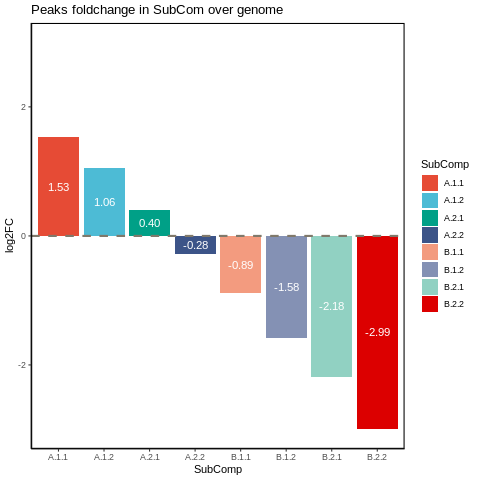

In [53]:
%%R -i R_plot_df
library(ggplot2)
library(ggsci)
R_plot_df$SubComp <- factor(R_plot_df$SubComp, 
                            levels = c('A.1.1', 'A.1.2', 'A.2.1', 'A.2.2',
                                       'B.1.1', 'B.1.2', 'B.2.1', 'B.2.2'))
p <- ggplot(R_plot_df, aes(x = SubComp, y = log2FC, fill = SubComp)) +
  geom_bar(stat = "identity") +
  # scale_fill_manual(values = c("background" = "#374E55FF", "H3K9me3" = "#DF8F44FF", "TSS" = "#00A1D5FF", "enh" = "#B24745FF")) +
  # scale_color_manual(values = c("background" = "#374E55FF", "H3K9me3" = "#DF8F44FF", "TSS" = "#00A1D5FF", "enh" = "#B24745FF")) +
  theme_bw() +
  theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_line()) +
  ylab("log2FC") + 
  
  geom_hline(yintercept = 0, linetype = "dashed", color = "#80796BFF", size = 1) +
  scale_color_npg() +
  scale_fill_npg() +
  # geom_text(aes(label = log2FC), vjust = -0.5, size = 4) +
  geom_text(aes(label = sprintf("%.2f", round(log2FC, digits = 2))), 
              position = position_stack(vjust = 0.5), 
              size = 4,
              color = "white") +
  ylim(-3, 3) +
  labs(title = "Peaks foldchange in SubCom over genome") 
  # theme_minimal()
ggsave("/data1/LLR/GpC/figure5/figure/Subcompartment_Peaksenrichment.pdf", p, device = "pdf")
p

In [55]:
R_Enh_plot_df

,SubComp,fold_change_over_genome,log2FC
0,A.1.2,2.267608,1.181171
1,A.1.1,3.316669,1.729735
2,B.1.1,0.328128,-1.607670
3,A.2.1,1.186537,0.246757
4,B.1.2,0.157045,-2.670750
5,A.2.2,0.671726,-0.574055
6,B.2.1,0.052024,-4.264683
7,B.2.2,0.019595,-5.673388


Saving 6.67 x 6.67 in image


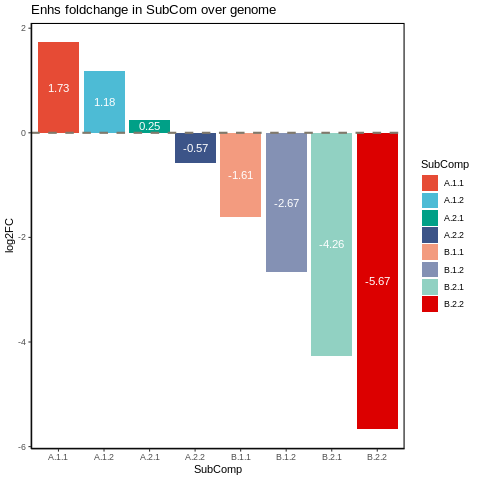

In [57]:
%%R -i R_Enh_plot_df
library(ggplot2)
library(ggsci)
R_Enh_plot_df$SubComp <- factor(R_Enh_plot_df$SubComp, 
                            levels = c('A.1.1', 'A.1.2', 'A.2.1', 'A.2.2',
                                       'B.1.1', 'B.1.2', 'B.2.1', 'B.2.2'))
p <- ggplot(R_Enh_plot_df, aes(x = SubComp, y = log2FC, fill = SubComp)) +
  geom_bar(stat = "identity") +
  # scale_fill_manual(values = c("background" = "#374E55FF", "H3K9me3" = "#DF8F44FF", "TSS" = "#00A1D5FF", "enh" = "#B24745FF")) +
  # scale_color_manual(values = c("background" = "#374E55FF", "H3K9me3" = "#DF8F44FF", "TSS" = "#00A1D5FF", "enh" = "#B24745FF")) +
  theme_bw() +
  theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_line()) +
  ylab("log2FC") + 
  
  geom_hline(yintercept = 0, linetype = "dashed", color = "#80796BFF", size = 1) +
  scale_color_npg() +
  scale_fill_npg() +
  # geom_text(aes(label = log2FC), vjust = -0.5, size = 4) +
  geom_text(aes(label = sprintf("%.2f", round(log2FC, digits = 2))), 
              position = position_stack(vjust = 0.5), 
              size = 4,
              color = "white") +
  # ylim(-3, 3) +
  labs(title = "Enhs foldchange in SubCom over genome") 
  # theme_minimal()
ggsave("/data1/LLR/GpC/figure5/figure/Subcompartment_Enhenrichment.pdf", p, device = "pdf")
p

In [100]:
corr_df_box_data = corr_df.copy()

In [107]:
%%R
library(ggplot2)
library(ggsci)
library(gridExtra)
library(tidyr)
library(ggpubr)

In [132]:
subcompartment_RNA_df = pd.read_table("/data1/LLR/GpC/figure3/process/GM12878_subcompartment_RNA_GpC_CpG.txt")

In [133]:
subcompartment_RNA_df

,subcomp,subval,RNAval,GpC,CpG,enh_GC,enh_CG
0,A.2.2,0.625,0.049631,0.105529,0.361539,NaN,NaN
1,A.2.2,0.625,0.049631,0.167507,0.410998,NaN,NaN
2,A.2.1,0.750,0.157044,0.074872,0.042580,NaN,NaN
3,A.2.1,0.750,6.038370,0.231217,0.191656,0.328491,0.121224
4,A.2.1,0.750,4.690138,0.132837,0.162953,0.328491,0.121224
...,...,...,...,...,...,...,...
17355,A.1.2,0.875,4.995258,0.255628,0.217703,0.210908,0.280348
17356,A.1.2,0.875,5.388534,0.231441,0.072665,0.210908,0.280348
17357,A.1.2,0.875,4.722466,0.320276,0.072971,0.383770,0.190645
17358,A.1.2,0.875,5.844988,0.318437,0.043912,0.338464,0.208652


Saving 6.67 x 6.67 in image


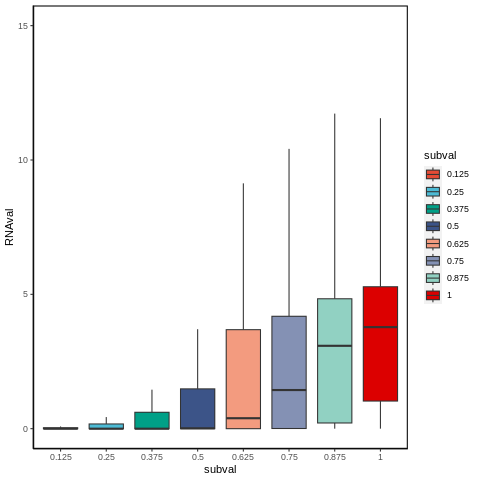

In [264]:
%%R -i subcompartment_RNA_df
subcompartment_RNA_df$subval <- factor(subcompartment_RNA_df$subval)
p <- ggplot(subcompartment_RNA_df, aes(x = subval, y = RNAval,  fill = subval)) +   
  geom_boxplot(outlier.shape = NA) + 
  labs(x = "subval", y = "RNAval") +
  scale_y_continuous(limits = c(0, 15)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_subcompartment_RNA.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


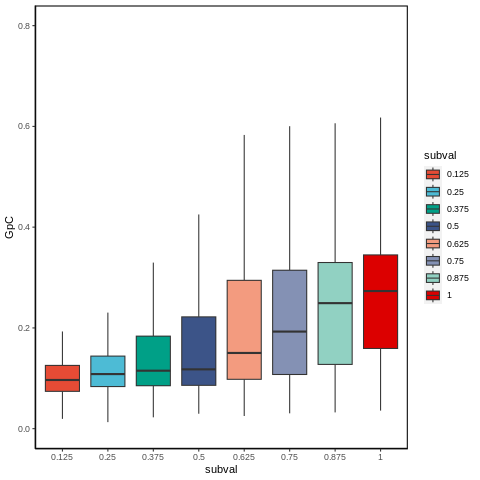

In [260]:
%%R -i subcompartment_RNA_df
subcompartment_RNA_df$subval <- factor(subcompartment_RNA_df$subval)
p <- ggplot(subcompartment_RNA_df, aes(x = subval, y = GpC,  fill = subval)) +   
  geom_boxplot(outlier.shape = NA) + 
  labs(x = "subval", y = "GpC") +
  scale_y_continuous(limits = c(0, 0.8)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_subcompartment_GpC.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


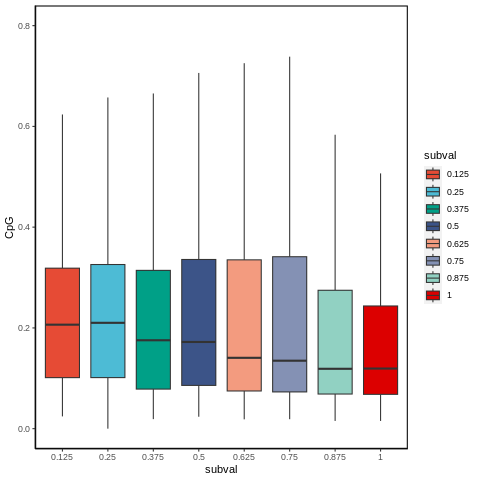

In [261]:
%%R -i subcompartment_RNA_df
subcompartment_RNA_df$subval <- factor(subcompartment_RNA_df$subval)
p <- ggplot(subcompartment_RNA_df, aes(x = subval, y = CpG,  fill = subval)) +   
  geom_boxplot(outlier.shape = NA) + 
  labs(x = "subval", y = "CpG") +
  scale_y_continuous(limits = c(0, 0.8)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_subcompartment_CpG.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


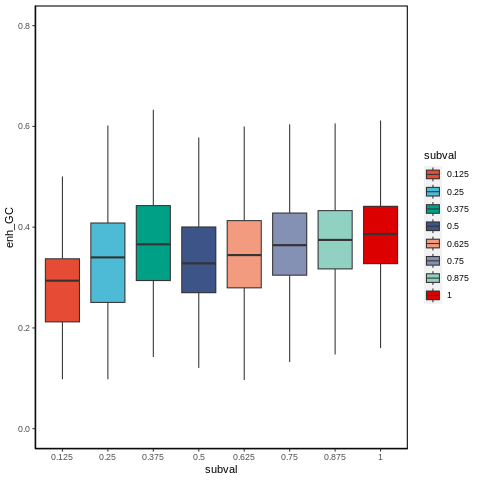

In [262]:
%%R -i subcompartment_RNA_df
subcompartment_RNA_df$subval <- factor(subcompartment_RNA_df$subval)
p <- ggplot(subcompartment_RNA_df, aes(x = subval, y = enh_GC,  fill = subval)) +   
  geom_boxplot(outlier.shape = NA) + 
  labs(x = "subval", y = "enh_GC") +
  scale_y_continuous(limits = c(0, 0.8)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_subcompartment_enh_GC.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


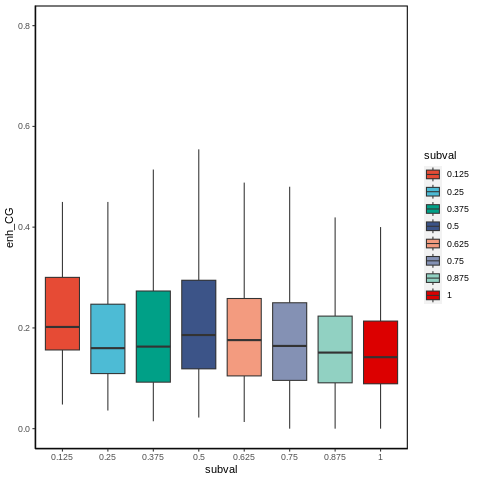

In [263]:
%%R -i subcompartment_RNA_df
subcompartment_RNA_df$subval <- factor(subcompartment_RNA_df$subval)
p <- ggplot(subcompartment_RNA_df, aes(x = subval, y = enh_CG,  fill = subval)) +   
  geom_boxplot(outlier.shape = NA) + 
  labs(x = "subval", y = "enh_CG") +
  scale_y_continuous(limits = c(0, 0.8)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_subcompartment_enh_CG.pdf", p, device = "pdf")
p

In [139]:
trans_df = pd.read_table("/data1/LLR/GpC/figure3/process/GM12878_ABcompartment_trans.txt")

In [140]:
trans_df

,genename,diff,logFC,GpC_FC,CpG_FC,group
0,PRKCZ,3,3.000000,-1.081014,-2.852719,B_to_A
1,NPHP4,3,3.547371,-0.341453,-0.650760,B_to_A
2,KCNAB2,3,5.384521,-0.123830,-0.087205,B_to_A
3,MST1L,3,2.137504,-0.257539,1.455814,B_to_A
4,MUL1,4,0.939032,-0.308761,-0.330501,B_to_A
...,...,...,...,...,...,...
659,FSD1L,-3,2.909511,-0.126433,-0.108829,A_to_B
660,RALGAPA1P1,-3,4.000000,1.334089,0.093218,A_to_B
661,FKTN,-3,0.306076,0.015817,-0.189819,A_to_B
662,SVEP1,-4,-4.321928,0.798276,0.188818,A_to_B


Saving 6.67 x 6.67 in image


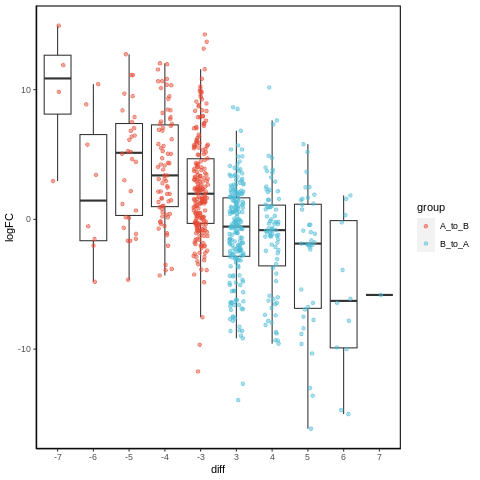

In [238]:
%%R -i trans_df
trans_df$diff <- factor(trans_df$diff)
p <- ggplot(trans_df, aes(x = diff, y = logFC,  fill = group)) +   
  geom_boxplot(outlier.shape = NA, fill=NA) + 
  labs(x = "diff", y = "logFC") +
  geom_jitter(aes(col = group), width = 0.2, alpha=0.5) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()

ggsave("/data1/LLR/GpC/figure3/figure/GM12878_ABcompartment_trans_logFC.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


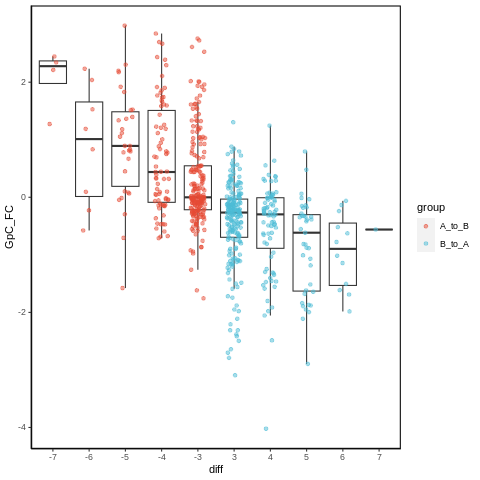

In [247]:
%%R -i trans_df
trans_df$diff <- factor(trans_df$diff)
p <- ggplot(trans_df, aes(x = diff, y = GpC_FC,  fill = group)) +   
  geom_boxplot(outlier.shape = NA, fill=NA) + 
  labs(x = "diff", y = "GpC_FC") +
  # geom_jitter(data=trans_df, aes(x = diff, y = GpC_FC,  fill = group), width = 0.2, alpha=0.5)+
  geom_jitter(aes(col = group), width = 0.2, alpha=0.5) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_ABcompartment_trans_GpCFC.pdf", p, device = "pdf")
p

Saving 6.67 x 6.67 in image


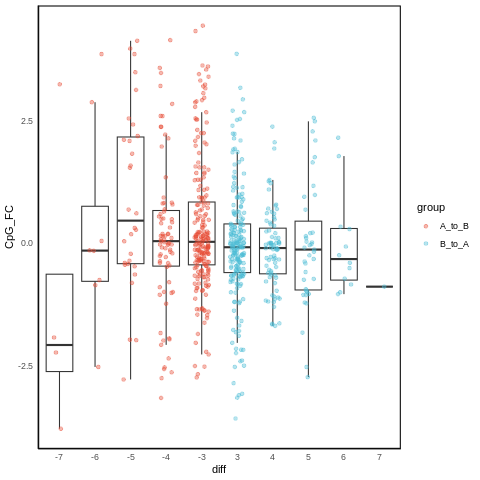

In [246]:
%%R -i trans_df
trans_df$diff <- factor(trans_df$diff)
p <- ggplot(trans_df, aes(x = diff, y = CpG_FC,  fill = group)) +   
  geom_boxplot(outlier.shape = NA, fill=NA) + 
  labs(x = "diff", y = "CpG_FC") +
  theme_minimal() +
  geom_jitter(aes(col = group), width = 0.2, alpha=0.4) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, size=1),
        axis.line = element_line(),) +
  scale_color_npg() +
  scale_fill_npg()
ggsave("/data1/LLR/GpC/figure3/figure/GM12878_ABcompartment_trans_CpG_FC.pdf", p, device = "pdf")
p

In [145]:
Subcompartment_GvsK_df = pd.read_table("/data1/LLR/GpC/figure3/process/Subcompartment_GvsK.txt")

In [146]:
Subcompartment_GvsK_df = Subcompartment_GvsK_df.set_index("k562")

In [176]:
Subcompartment_GvsK_df

,A.1.1,A.1.2,A.2.1,A.2.2,B.1.1,B.1.2,B.2.1,B.2.2
k562,,,,,,,,
A.1.1,5827,2458,752,294,106,116,47,26
A.1.2,2059,2476,1648,918,489,300,135,127
A.2.1,627,1008,1088,949,776,554,408,132
A.2.2,381,578,720,754,808,756,685,304
B.1.1,187,328,401,448,614,836,990,492
B.1.2,130,136,245,242,419,858,1336,964
B.2.1,108,111,239,291,381,774,2115,2698
B.2.2,69,149,187,307,503,855,2721,5670


In [207]:
%%R -i Subcompartment_GvsK_df

head(Subcompartment_GvsK_df)


      A.1.1 A.1.2 A.2.1 A.2.2 B.1.1 B.1.2 B.2.1 B.2.2   Row
A.1.1  5827  2458   752   294   106   116    47    26 A.1.1
A.1.2  2059  2476  1648   918   489   300   135   127 A.1.2
A.2.1   627  1008  1088   949   776   554   408   132 A.2.1
A.2.2   381   578   720   754   808   756   685   304 A.2.2
B.1.1   187   328   401   448   614   836   990   492 B.1.1
B.1.2   130   136   245   242   419   858  1336   964 B.1.2


In [214]:
%%R
# df <- data.frame(A.1.1 = c(5827, 2059), A.1.2 = c(2458, 2476))
# rownames(df) <- c("A.1.1", "A.1.2")

# 将行名称转换为数据框的一个列

# 现在使用melt函数，指定id.vars为新添加的行名列

# 查看转换后的数据框
print(melted_df)

     Row Column Value
1  A.1.1  A.1.1  5827
2  A.1.2  A.1.1  2059
3  A.2.1  A.1.1   627
4  A.2.2  A.1.1   381
5  B.1.1  A.1.1   187
6  B.1.2  A.1.1   130
7  B.2.1  A.1.1   108
8  B.2.2  A.1.1    69
9  A.1.1  A.1.2  2458
10 A.1.2  A.1.2  2476
11 A.2.1  A.1.2  1008
12 A.2.2  A.1.2   578
13 B.1.1  A.1.2   328
14 B.1.2  A.1.2   136
15 B.2.1  A.1.2   111
16 B.2.2  A.1.2   149
17 A.1.1  A.2.1   752
18 A.1.2  A.2.1  1648
19 A.2.1  A.2.1  1088
20 A.2.2  A.2.1   720
21 B.1.1  A.2.1   401
22 B.1.2  A.2.1   245
23 B.2.1  A.2.1   239
24 B.2.2  A.2.1   187
25 A.1.1  A.2.2   294
26 A.1.2  A.2.2   918
27 A.2.1  A.2.2   949
28 A.2.2  A.2.2   754
29 B.1.1  A.2.2   448
30 B.1.2  A.2.2   242
31 B.2.1  A.2.2   291
32 B.2.2  A.2.2   307
33 A.1.1  B.1.1   106
34 A.1.2  B.1.1   489
35 A.2.1  B.1.1   776
36 A.2.2  B.1.1   808
37 B.1.1  B.1.1   614
38 B.1.2  B.1.1   419
39 B.2.1  B.1.1   381
40 B.2.2  B.1.1   503
41 A.1.1  B.1.2   116
42 A.1.2  B.1.2   300
43 A.2.1  B.1.2   554
44 A.2.2  B.1.2   756
45 B.1.1  

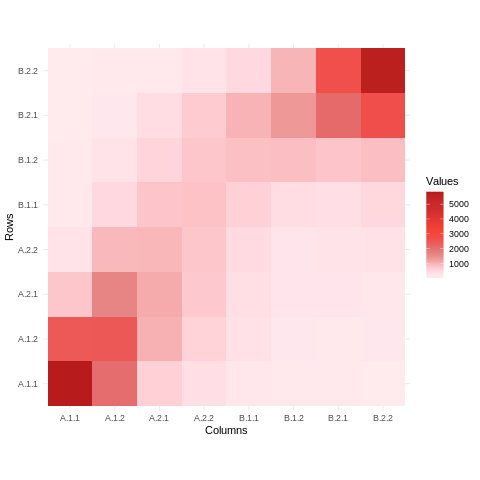

In [216]:
%%R -i Subcompartment_GvsK_df
library(reshape2)
Subcompartment_GvsK_df$Row <- rownames(Subcompartment_GvsK_df)
melted_df <- melt(Subcompartment_GvsK_df, id.vars = 'Row', variable.name = "Column", value.name = "Value")
names(df)[1] <- "Columns"
options(repr.plot.width = 4, repr.plot.height =2)
# 使用ggplot2创建热图
p<-ggplot(melted_df, aes(x = Row , y = Column , fill = Value)) +
  geom_tile() +  # 绘制热图块
  # scale_fill_gradient(low = "blue", high = "red") +  # 定义颜色渐变
  # scale_fill_gsea()+
   scale_fill_material("red") +
  theme_minimal() +  # 使用简约主题
  labs(x = "Columns", y = "Rows", fill = "Values") + # 添加标签
  coord_equal()
ggsave("/data1/LLR/GpC/figure3/figure/Subcompartment_GvsK.pdf", p, device = "pdf")
p

In [170]:
%%R
heatmap_data_long

   k562 variable value
1  5827    A.1.2  2458
2  2059    A.1.2  2476
3   627    A.1.2  1008
4   381    A.1.2   578
5   187    A.1.2   328
6   130    A.1.2   136
7   108    A.1.2   111
8    69    A.1.2   149
9  5827    A.2.1   752
10 2059    A.2.1  1648
11  627    A.2.1  1088
12  381    A.2.1   720
13  187    A.2.1   401
14  130    A.2.1   245
15  108    A.2.1   239
16   69    A.2.1   187
17 5827    A.2.2   294
18 2059    A.2.2   918
19  627    A.2.2   949
20  381    A.2.2   754
21  187    A.2.2   448
22  130    A.2.2   242
23  108    A.2.2   291
24   69    A.2.2   307
25 5827    B.1.1   106
26 2059    B.1.1   489
27  627    B.1.1   776
28  381    B.1.1   808
29  187    B.1.1   614
30  130    B.1.1   419
31  108    B.1.1   381
32   69    B.1.1   503
33 5827    B.1.2   116
34 2059    B.1.2   300
35  627    B.1.2   554
36  381    B.1.2   756
37  187    B.1.2   836
38  130    B.1.2   858
39  108    B.1.2   774
40   69    B.1.2   855
41 5827    B.2.1    47
42 2059    B.2.1   135
43  627    

In [263]:
%%R
heatmap_data

  Row Col1 Col2 Col3 Col4
1   A   10   15   12   18
2   B   20   25   22   28
3   C   30   35   32   38
4   D   40   45   42   48
5   E   50   55   52   58
